# Visualizing the Traffic on the Burke-Gilman Trail

#### This notebook aims to provide a brief sample of visualizations based on the data obtained from a tracker placed at the NE 70th St. intersection with the Burke-Gilman Trail from 2014 - 2019.

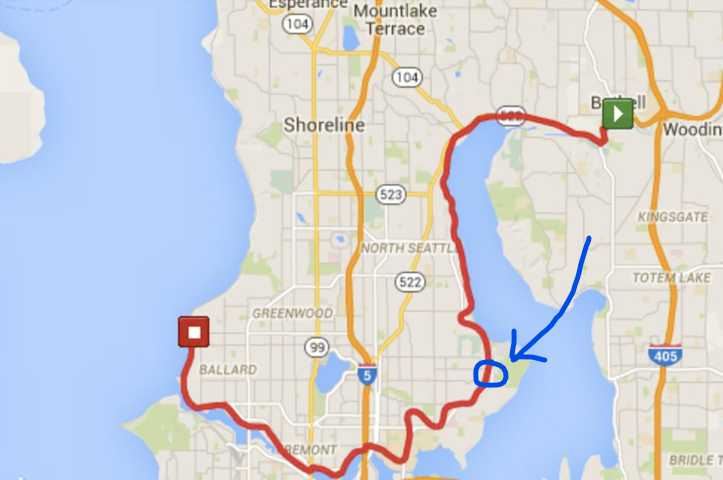

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-deep')
trail_data = pd.read_csv(r"C:\Projects\burke-gilman-trail-north-of-ne-70th-st-bike-and-ped-counter.csv")

## Questions we answer in this notebook:

**1. Does the trail see more bikes or pedestrians?**

*2. What is the busiest month of the year? (in-prog)*

*3. What is the busiest day of the week? (in-prog)*

*4. What is the busiest hour on average? (in-prog)*

*5. How has trail usage changed year-by-year? (in-prog)*

In [ ]:
Dataset Location = https://www.kaggle.com/datasets/city-of-seattle/seattle-burke-gilman-trail?resource=download

Columns present in the dataset:

In [48]:
list(trail_data.columns)

['Date',
 'BGT North of NE 70th Total',
 'Ped South',
 'Ped North',
 'Bike North',
 'Bike South']

In [49]:
trail_data.head()

,Date,BGT North of NE 70th Total,Ped South,Ped North,Bike North,Bike South
0,2014-01-01T00:00:00.000,15.0,0.0,2.0,2.0,11.0
1,2014-01-01T01:00:00.000,9.0,1.0,0.0,1.0,7.0
2,2014-01-01T02:00:00.000,9.0,0.0,0.0,0.0,9.0
3,2014-01-01T03:00:00.000,19.0,0.0,0.0,0.0,19.0
4,2014-01-01T04:00:00.000,19.0,0.0,0.0,0.0,19.0


Creating DataFrame

In [50]:
trail_df = pd.DataFrame(trail_data)

Fixing column names

In [51]:
trail_df.rename(columns = {'Date':'date', 
                           'BGT North of NE 70th Total':'total', 
                           'Ped South':'pedsouth', 
                           'Ped North':'pednorth',
                           'Bike North':'bikenorth',
                           'Bike South':'bikesouth'}, inplace=True)

In [52]:
trail_df.head()

,date,total,pedsouth,pednorth,bikenorth,bikesouth
0,2014-01-01T00:00:00.000,15.0,0.0,2.0,2.0,11.0
1,2014-01-01T01:00:00.000,9.0,1.0,0.0,1.0,7.0
2,2014-01-01T02:00:00.000,9.0,0.0,0.0,0.0,9.0
3,2014-01-01T03:00:00.000,19.0,0.0,0.0,0.0,19.0
4,2014-01-01T04:00:00.000,19.0,0.0,0.0,0.0,19.0


### 1. Does the trail see more bikes or pedestrians?

Add Total Pedestrians and Total Bikes columns

In [122]:
trail_df['Total Peds'] = trail_df.pedsouth + trail_df.pednorth
trail_df['Total Bikes'] = trail_df.bikesouth + trail_df.bikenorth

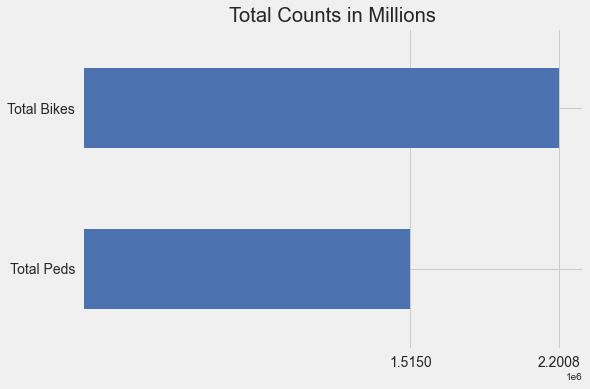

In [123]:
trail_df[['Total Peds', 'Total Bikes']].sum().plot.barh(fontsize = 14,
                                                        title='Total Counts in Millions',
                                                        xticks=(trail_df['Total Peds'].sum(), 
                                                                trail_df['Total Bikes'].sum()))
plt.show()

The trail saw more bikes over the 5 years, with over 2 million bikes travelling in that timeframe.

### 2. What is the busiest month of the year?